# Adult Income Data Analysis
![title](picture.png)

## 1. Introduction

A population census is defined as the total process of collecting, compiling, and publishing demographic, economic, and social data pertaining to a specific time to all persons in a country or delimited part of a country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country.

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

### Objective of this project

My objective for this project is
* Ask questions about and explore data
* Identify trends, correlations and make hypotheses
* use text and plots to communicate and present insights


## 2.Fetching Data

In [39]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import os
%matplotlib inline
import scipy.stats
import numpy as np
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
myfold = os.getcwd()

In [3]:
df = pd.read_csv(myfold + '/adult.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

In [7]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
for i in df.columns:
    print('Column',i,',Missing values :',df.loc[df[i] == '?',i].size)

Column age ,Missing values : 0
Column workclass ,Missing values : 2799
Column fnlwgt ,Missing values : 0
Column education ,Missing values : 0
Column educational-num ,Missing values : 0
Column marital-status ,Missing values : 0
Column occupation ,Missing values : 2809
Column relationship ,Missing values : 0
Column race ,Missing values : 0
Column gender ,Missing values : 0
Column capital-gain ,Missing values : 0
Column capital-loss ,Missing values : 0
Column hours-per-week ,Missing values : 0
Column native-country ,Missing values : 857
Column income ,Missing values : 0


There are three columns with some missing values:

workclass = 2799 missing

occupation = 2809 missing

native.country = 857 missing

The count of missing values in workclass and occupation column seem pretty close. Let's investigate theses two columns further.

In [9]:
temp_df = df.loc[((df['occupation']=='?') & (df['workclass']=='?')),:]
temp_df.shape

(2799, 15)

It is clear that where ever occupation is missing, workclass is missing too.

In [10]:
df.replace('?', np.nan, inplace=True)

In [11]:

print("count of NULL values before imputation\n")
df.isnull().sum()

count of NULL values before imputation



age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

## 3.Cleaning Data

In [12]:

# Missing values is represented using NaN and hence specified. If it
# is empty field, missing values will be specified as ''

imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
 
df.workclass = imputer.fit_transform(df['workclass'].values.reshape(-1,1))[:,0]
df.occupation = imputer.fit_transform(df['occupation'].values.reshape(-1,1))[:,0] 

In [13]:
df['native-country'] = imputer.fit_transform(df['native-country'].values.reshape(-1,1))[:,0]
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Let's categorize the education column to make it simple

In [14]:
df[['education']] = df[['education']].replace(dict.fromkeys(['Preschool','10th','11th','12th','1st-4th',
                                '5th-6th','7th-8th','9th'], 'dropout'))
df[['education']] = df[['education']].replace(dict.fromkeys(['HS-Grad','HS-grad'],'HighGrad'))
df[['education']] = df[['education']].replace(dict.fromkeys(['Some-college','Assoc-acdm','Assoc-voc'],'CommunityCollege'))
df[['education']] = df[['education']].replace(dict.fromkeys(['Prof-school', 'Masters'],'Masters')) 

Let's simplify the categorization of the marital status column as well.

In [15]:
df['marital-status']= df[['marital-status']].replace(dict.fromkeys(['Separated','Married-spouse-absent'],'Separated'))
df['marital-status']= df[['marital-status']].replace(dict.fromkeys(['Married-AF-spouse','Married-civ-spouse'],'Married'))
df['marital-status']= df[['marital-status']].replace(dict.fromkeys(['Never-married'],'Notmarried'))


## 4.Summary statistics of attributes

### Numerical attributes

In [36]:
data_numeric = df.drop(["educational-num","income"], axis=1)
data_numeric.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


From this we can infer:

**Age:**  
The mean value is 38.
The value of Age attribute varies from 17 to 90.
The 1st quartile is 28 i.e. 25% of the population's age is observed to be below 28 years.
3rd quartile is 48 which indicates that for 75% of the observations the age is less than 48 years.
The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the age of 48 years.
The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum makes the distribution right skewed.

**fnlwgt:**

This is the sampling weight corresponding to the observations.
finalweight seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value.

**capital-gain:**

For capital-gain, the mean is 1079.06 and median is 0, which indicates that the distribution is highly right skewed.
From the qurtiles it is clearly visible that 75% observations are having capital gain of zero.
capital-gain shows that either a person has no gain or has a very large gain.

**capital-loss:**

This attribute is similar to the capital-gain i.e. most of the values are centered on 0.
Mean is 87 but median is 0. This tells that it is a right skewed distribution.

**hours-per-week:**

Number of hours spent working by an individual in a week.
On an average people spend 40 hours per week on work.
The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
Observations are very sparse below 25th percentile and after 75th percentile.
From the quartiles the data appears symmetric.

### Categorical attributes

In [16]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,6,5,14,6,5,2,41,2
top,Private,HighGrad,Married,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22416,8981,19716,41762,32650,44689,37155


* Native-country has maximum number of unique categories (41).But the data is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).

* Occupation has more or less uniform distribution of categories as comparerd to the other attributes.

* Race is also biased to the white race category(41762) with 85.5%.

* The top category in workclass is Private having frequency(36705) and percentage(75.5%)

## 5.Exploratory Data Analysis

#### What is the age distirbution of the working people in the given dtataset?

<function matplotlib.pyplot.show(close=None, block=None)>

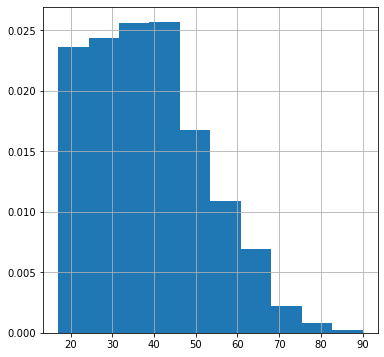

In [17]:
df['age'].hist(figsize=(6,6),density=True)
plt.show

From the above histogram it is clear that :

"age" attribute is not symmetric. It is right-skewed(But this is totally fine as the working population is normally young)

Minimum and Maximum age of the people is 17 and 90 respectively.

#### How many hours/week do people work?

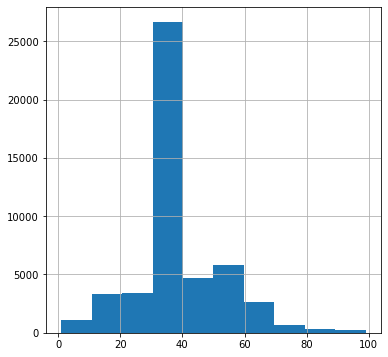

In [18]:
df['hours-per-week'].hist(figsize=(6,6))
plt.show()

This histogram on working hours per week shows that:

* Most people work 40 hour week, this population is around 27,000 people in our dataset.
* There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
* 75 percentage of the people spend 45 or less working hours per week.

#### What is the education profile of the population?

<AxesSubplot:xlabel='education', ylabel='count'>

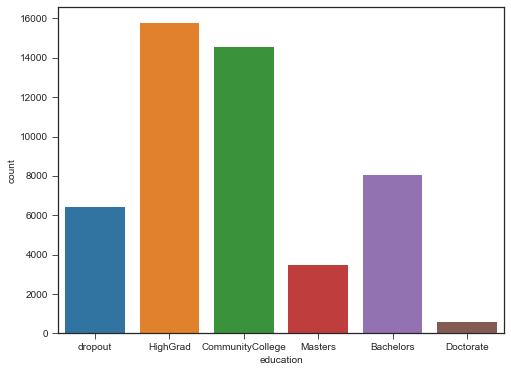

In [19]:
fig = plt.figure(figsize=(8,6))
plt.style.use('seaborn-ticks')
sns.countplot(x="education", data=df)

High school grads make around 32.32% of all the education attribute. 

#### What is the marital status of our population?

<AxesSubplot:xlabel='marital-status', ylabel='count'>

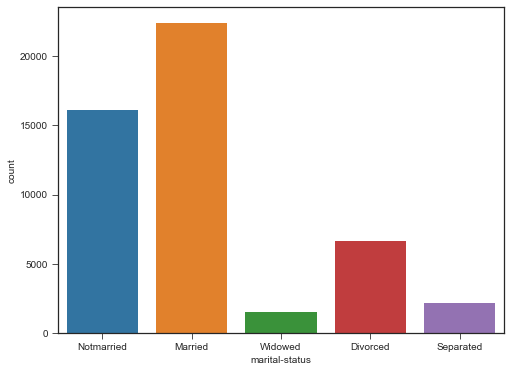

In [20]:
fig = plt.figure(figsize=(8,6))
plt.style.use('seaborn-ticks')
sns.countplot(x="marital-status", data=df)

#### What kind of occupation do people in the polpulation have?

<AxesSubplot:xlabel='occupation', ylabel='count'>

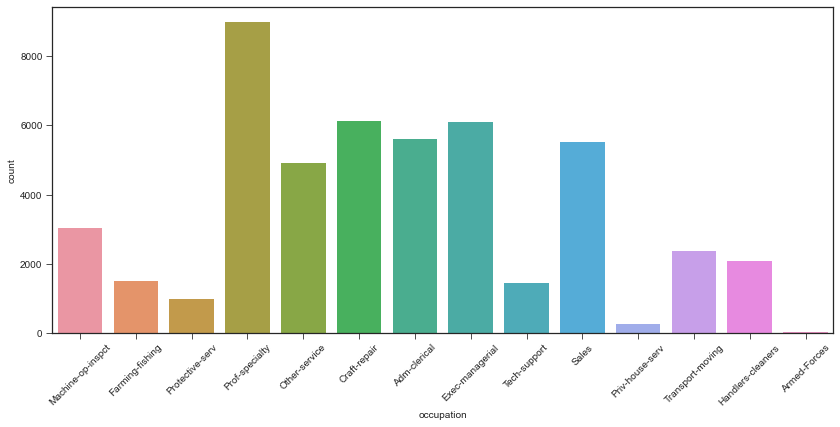

In [21]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6)) 
plt.xticks(rotation=45)
sns.countplot(x="occupation", data=df)

Prof-specialty has the maximum count. Armed-Forces has minimum samples in the occupation attribute.

#### Where do people work?

<AxesSubplot:xlabel='workclass', ylabel='count'>

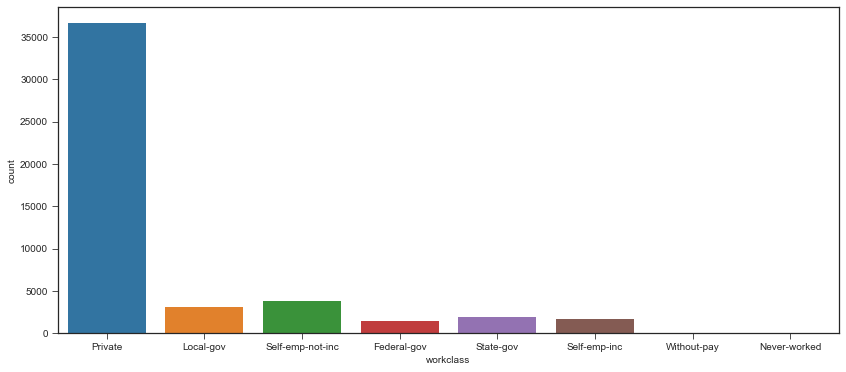

In [22]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6)) 
sns.countplot(x="workclass", data=df)

Majority of the population works in the private sector.

#### Is there adequate representation of all the races in our data?

<AxesSubplot:xlabel='race', ylabel='count'>

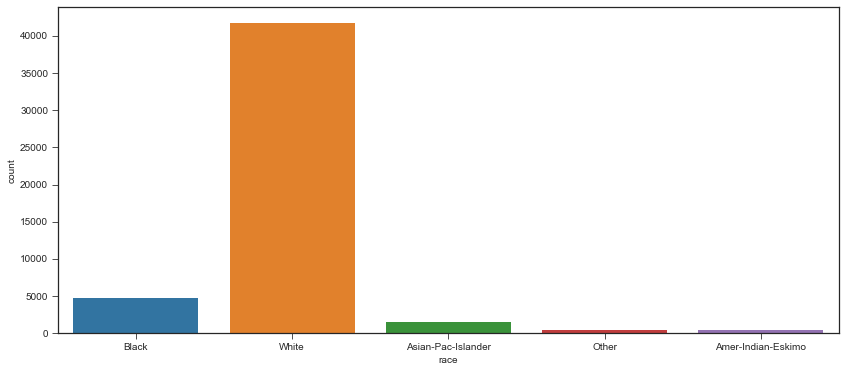

In [23]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(14,6)) 
sns.countplot(x="race", data=df)

White population makes about 86% of the data.

#### How is the data distributed across gender?

<AxesSubplot:xlabel='gender', ylabel='count'>

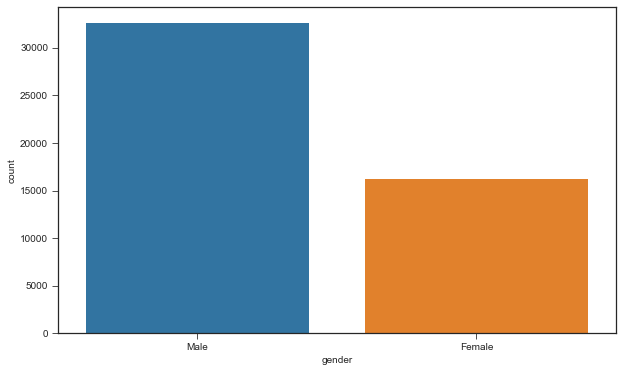

In [24]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,6)) 
sns.countplot(x="gender", data=df)


Frequency of male is higher than female.

#### How does age relate to income earned?

<function matplotlib.pyplot.show(close=None, block=None)>

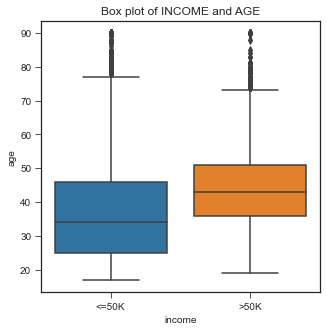

In [25]:
#Box plots
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')
plt.show

The above boxplot shows :

Outliers are present in both the income group(<=50k and >50k) wrt "age" attribute.

Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
Interquartile range(IQR) :
For Income group(<=50k) , IQR is between [25,46] (long range)
Middle 50% of the Age is spread over longer range for the income group who earn <=50k.

For Income group(>50k) , IQR is between [38,50] (shorter range)

#### Hypothesis test (to test the relationship between income & Age )

**Two sampled T-test** :This is also known as Independent t Test and is aparametric test.This test compares the means of two independent groups in order to determine whether there is a statistical evidence, that the associated population means are significantly different.

Our Null and alternate hypothesis will be as follows.

* Null Hypothesis :- there is no difference in Mean age of income group >50k and income group <=50k.
* Alternate Hypothesis :- there is difference a in Mean age of income group >50k and income group <=50k.

In [26]:
import random

data = df[(np.abs(stats.zscore(df["age"])) < 3)] 
income_1 = data[data['income']== '>50K']['age']
income_0 = data[data['income']=='<=50K']['age']
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [37]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

ttest 3.5584592128142725
p value 0.00047405514561774635
Reject null hypothesis


There seems to be a significant difference in the mean ages of income group >50k and income group <=50k.
Age has some contribution to the distinguish income groups.

It looks like as you grow and gain experience your income also goes up.

#### Is there any relationship between number of hours worked per week and income?

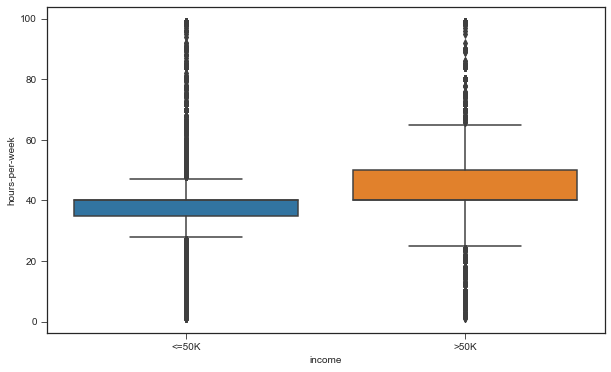

In [28]:
fig = plt.figure(figsize=(10,6)) 
sns.boxplot(x="income", y="hours-per-week", data=df)
plt.show()

Analysis with the boxplot shows that:

The median "hours-per-week" for Income group who earns >50k is greater than the Income group who earns <=50k.

This can be interpreted as follows:

Income group which earns >50k spends close to 44 "hours-per-week".(long hours)
Income group which earns <=50k spends close to 37 "hours-per-week".
The boxplot for Income group that earns <=50k has small range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) [28,48] approx. 
But the boxplot for Income group who earns >50k has large range for minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR) [23,68] approx.

This means that:

Income group that earns >50k have flexible working hours
More Outliers are present in the Income group that earns <=50k.

#### Hypotesis for our test

* Null Hypothesis :- There is no difference in Mean of income group >50k and income group <=50k.
* Alternate Hypothesis :- There is difference in Mean of income group >50k and income group <=50k.

In [29]:
data = df[(np.abs(stats.zscore(df["hours-per-week"])) < 3)] 

income_1 = data[data['income']== '>50K']["hours-per-week"]
income_0 = data[data['income']=='<=50K']["hours-per-week"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)

if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest 3.5584592128142725
p value 0.00047405514561774635
we reject null hypothesis


There is difference in Mean of income group >50k and income group <=50k.
This means that the hours-per-week attribute does influence our income groups.

#### Does race and gender have any relationship with income?


<Figure size 1440x360 with 0 Axes>

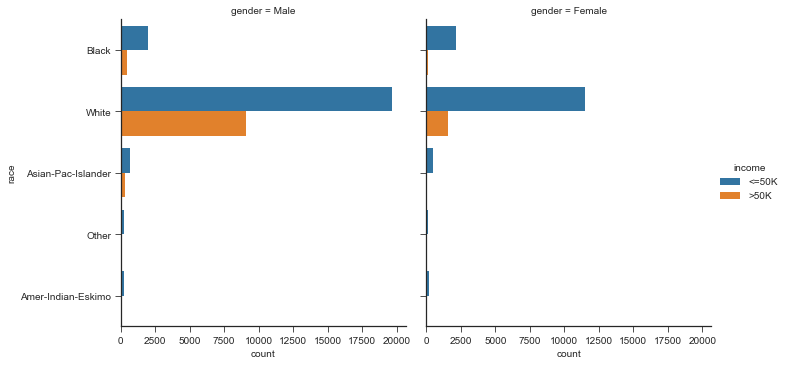

In [30]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df);

Two things are clear
1. There are more males earning more than 50K compared to women.
2. There are more white men and women earning more than 50K

#### How does income corelate to education?

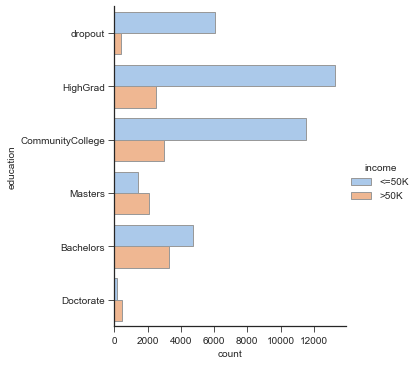

In [31]:
sns.catplot(y="education", hue="income", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);

As the education level goes up the proportion of people earning more than 50K inceases. There by implying higher education leads to higher income.

#### Does marital status impact income?

<AxesSubplot:xlabel='marital-status', ylabel='count'>

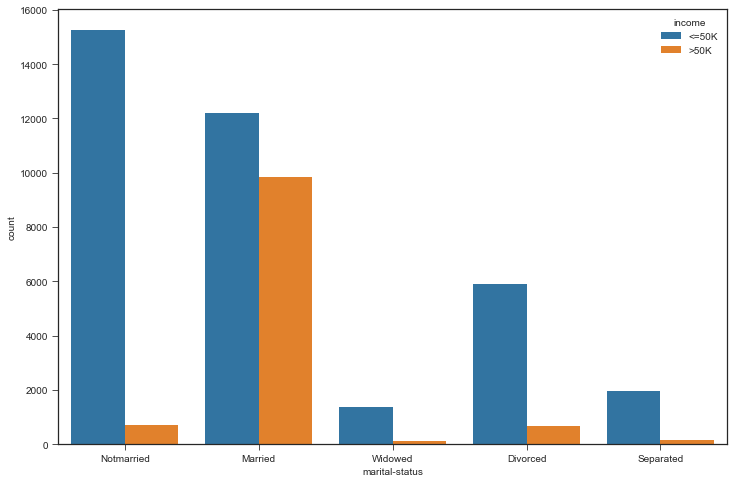

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x="marital-status", hue="income", data=data)

Looks like the proportion of people earning more than 50K is high among married people. 

Hypothesis to test the relationship between income & marital-status

H0(Null Hypothesis) : There is no relationship between marital-status and income.

H1(Alternate Hypothesis) : There is a relationship between marital-status and income.

Contingency Table is one of the techniques for exploring two or even more variables. It is basically a tally of counts between two or more categorical variables. We will use a contingency table to see the correlation between marital status and income.

It is difficult to determine relationship from the table itself. We will use the Pearson’s Chi-Squared test for the same.

In [32]:
# contingency table
c_t = pd.crosstab(df['marital-status'].sample(frac=0.002, replace=True, random_state=1),
                  df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
marital-status,,
Divorced,6,0
Married,28,23
Notmarried,31,3
Separated,1,1
Widowed,5,0


In [43]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

dof=4
p_value 0.0009723128666570135
[[ 4.34693878  1.65306122]
 [36.94897959 14.05102041]
 [24.63265306  9.36734694]
 [ 1.44897959  0.55102041]
 [ 3.62244898  1.37755102]]
probability=0.950, critical=9.488, stat=18.529
Reject null hypothesis


We can conclude that there is some dependency of "marital-status" attribute on "income".

#### Lets look at correlation among the numeric variables

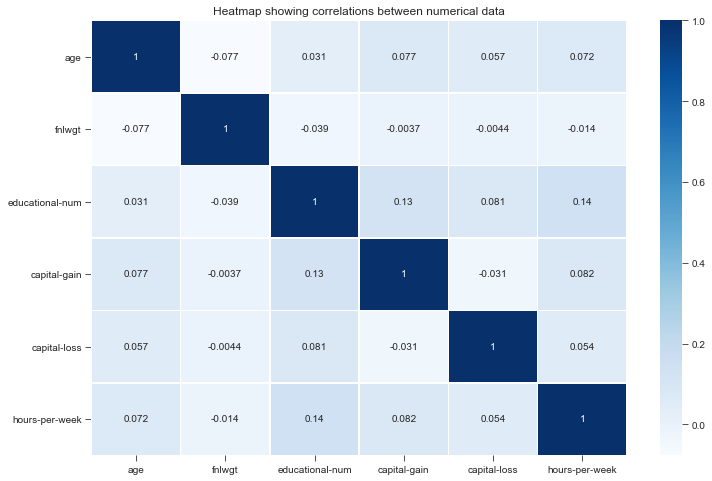

In [33]:
plt.figure(figsize=(12,8))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

* There is no strong correlation among the attributes.

#### Let's analyze the income of the genders based on number of hours/week

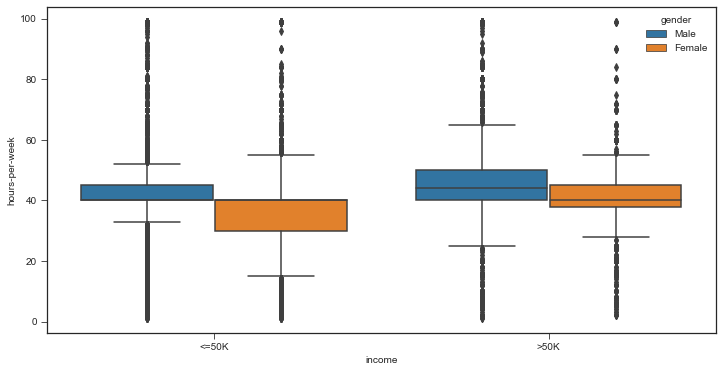

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=df)
plt.show()

The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
Boxplot range [minimum (q1-1.5 IQR) and maximum (q3+ 1.5 IQR)] for females is more than that of males in Income group that earns <=50k.This implies that Females have more flexible working hours per week in this income group.

Boxplot range for males is more that that of the females in the Income group who earns >50k. Males have more flexible working hours per week in this income group.

#### Lets perform a multivariate analysis between "income", "age", "gender"

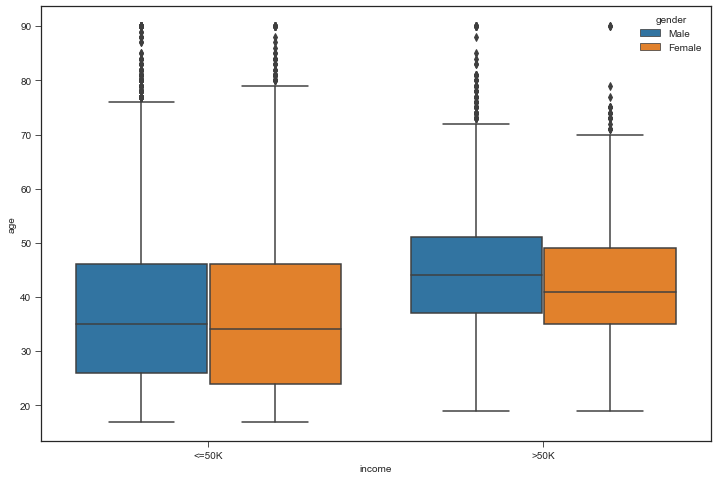

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x="income", y="age",hue="gender",data=df)
plt.show()

Median "age" of Females who earn less than 50k has slight difference than the Median "age" of males who earn less than 50k. But the Median "age" of Females who earn greater than 50k has age difference of 2-3years than the Median "age" of males who earn greater than 50k. May be there is less representation on women earning more than 50K in this data set.

## 6.Conclusion

By these visualizations, we can deduce some correlations:

1. This dataset is not balanced, 76% of population belongs to one income group(who earns less than 50k) and 23.93% fall under the income group who earn more than 50k.
2.  In general people can be seen working for 30 hours to 40 hours per week.
3. Income group earning >50k have flexible working hours.
4. Higher education educational background leads to better income and it is likely  that people having prof-school and doctorates degree will have their income higher than 50K.
5. Our data suggest that people with occupation Prof-specialty and Exec-managerial will have a better chance of earning an income of more than 50K.
6. The gender bar chart provides us some useful insight into the data that Men are more likely to have a higher income than women.
7. Relationship chart shows us that wife and husband has a higher income. A married couple would most likely earn >50K.
8. As per the data, race has impact on the income.
9. Again,Self-emp-in, Federal-gov workclass groups have a higher chance of earning more than 50K.

Attributes affecting the target feature:
* Age
* Hours per week
* workclass
* Education
* marital-status
* occupation
* relationship
* race
* gender
* native-country

We can see that all of our numerical attributes have some influence on our target variable income. So, we can create ML models to predict income by feeding all of our numerical data as input to it.
